**Experiment 3: Generation of Delta Modulation and its demodulation.**

Simulation study of DM and reconstruction of analog signals. Find the effect of step size ∆ on the signal reconstruction.

**Transmitter**

1. Generate a sinusoidal signal of amplitude 5 and frequency 100 Hz. Choose appropriate sampling frequency (usually 4- or 5-times Nyquist rate) and plot for two cycles.

2. Generate the staircase approximation to the sinusoidal signal.

3. Plot the original signal and staircase approximation on the same graph.

4. Change the step size and observe slope-overloading issue in Delta Modulation.

5. Generate the DM wave -transmitted binary stream of ±∆. Encode +∆ to 1 and -∆ to zero.

**Receiver**

1. Decode the received binary stream and pass through an accumulator.

2. Pass through a low pass filter to reconstruct the signal.

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


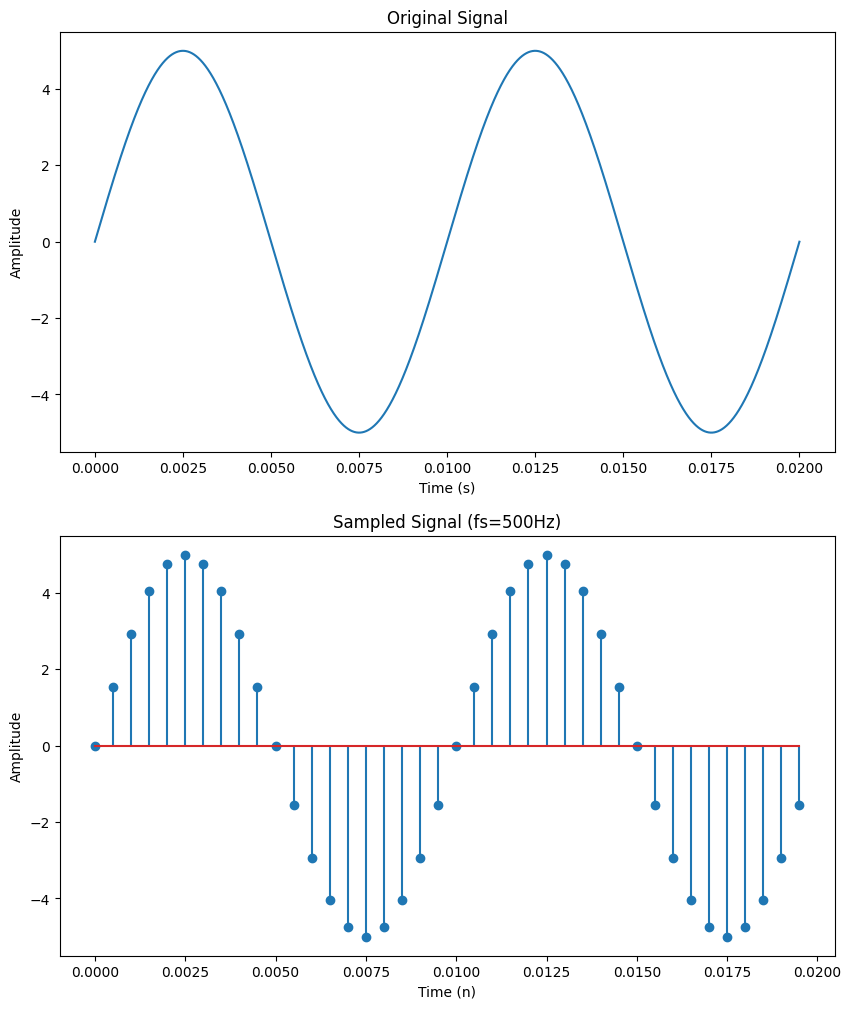

In [2]:
# 1. Generate a sinusoidal signal of amplitude 5 and frequency 100 Hz. Choose appropriate sampling frequency (usually 4- or 5-times Nyquist rate) and plot for two cycles.
# Parameters
A=5
f=100
fs=5*2*f*2
T = 2/f

#Generating the Original signal
t = np.arange(0,T,1/1000000000)
x = A*np.sin(2*np.pi*f*t)

#Sampling the signal
ts = np.arange(0,T,1/fs)
xs = np.interp(ts,t,x)


plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
plt.stem(ts,xs)
plt.title('Sampled Signal (fs=500Hz)')
plt.xlabel('Time (n)')
plt.ylabel('Amplitude')
plt.show()





In [3]:
slope_overloading_delta = A*2*np.pi*f/fs
slope_overloading_delta



1.5707963267948966

In [4]:
step_size = 0.75 #less than the slope_overloading_delta

In [5]:
def delta_modulation(signal, step_size):
    delta_modulated_signal = []
    delta_quantized_signal = []
    prev_approximation = 0
    if signal[0] >= step_size:
        delta_modulated_signal.append(1)
        delta_quantized_signal.append(step_size)
        prev_approximation += step_size
    else:
        delta_modulated_signal.append(0)
        delta_quantized_signal.append(-step_size)
        prev_approximation -= step_size
    
    for sample in signal[1:]:
        delta = sample - prev_approximation
        if delta >= step_size:
            delta_modulated_signal.append(1)
            delta_quantized_signal.append(prev_approximation + step_size)
            prev_approximation += step_size
        elif delta <= -step_size:
            delta_modulated_signal.append(0)
            delta_quantized_signal.append(prev_approximation - step_size)
            prev_approximation -= step_size
        else:
            delta_modulated_signal.append(delta_modulated_signal[-1])
            delta_quantized_signal.append(prev_approximation)
        
    signals = {
            'delta_modulated_signal': delta_modulated_signal,
            'delta_quantized_signal': delta_quantized_signal
        }
    return signals


In [6]:
delta_modulated_signals_less_than_slope = delta_modulation(xs, step_size)

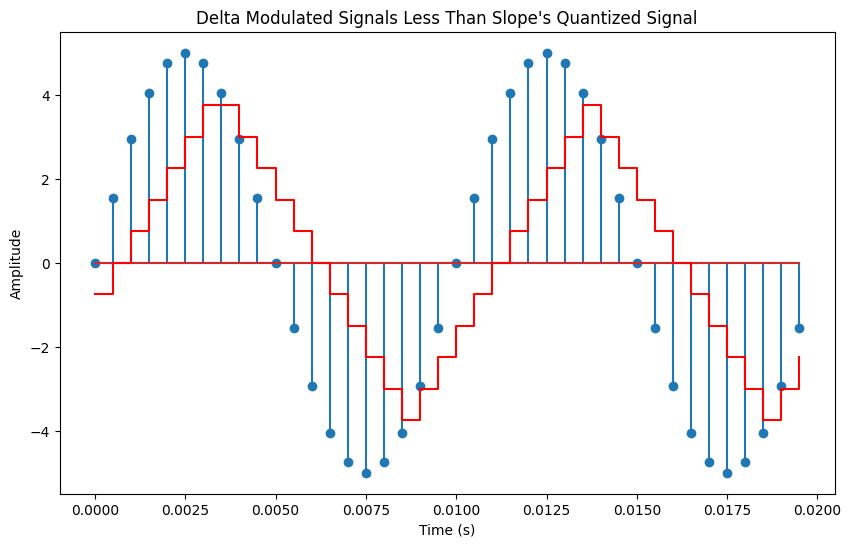

In [7]:
plt.figure(figsize=(10, 6))
plt.stem(ts, xs, label="Sampled Signal")
plt.step(ts, delta_modulated_signals_less_than_slope["delta_quantized_signal"], label="Delta Modulated Signal", where='post', color='r')
plt.title("Delta Modulated Signals Less Than Slope's Quantized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [8]:

def delta_demodulation_decoder(delta_modulated_signal, step_size):

    decoded_signal = []
    prev_approximation = 0
    
    for bit in delta_modulated_signal:
        if bit == 1:
            prev_approximation += step_size
        else:
            prev_approximation -= step_size
        decoded_signal.append(prev_approximation)
    
    return decoded_signal



In [9]:
delta_modulated_signals = delta_modulation(xs, slope_overloading_delta)

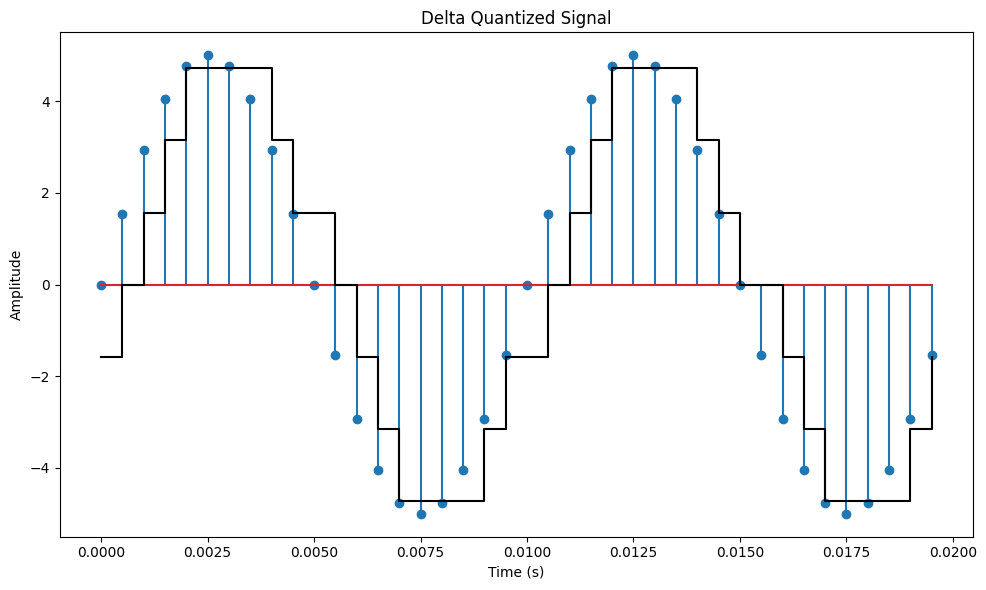

In [10]:
plt.figure(figsize=(10, 6))
plt.stem(ts, xs)
plt.step(ts, delta_modulated_signals["delta_quantized_signal"], label="Delta Modulated Signal", where='post',color='black')
plt.title('Delta Quantized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


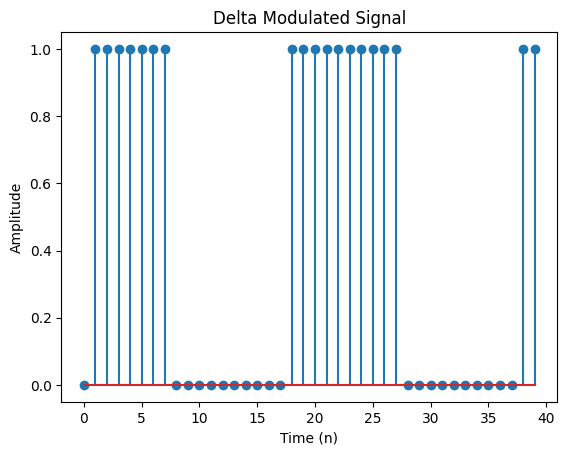

In [11]:
plt.stem(delta_modulated_signals["delta_modulated_signal"])
plt.title('Delta Modulated Signal')
plt.xlabel('Time (n)')
plt.ylabel('Amplitude')
plt.show()


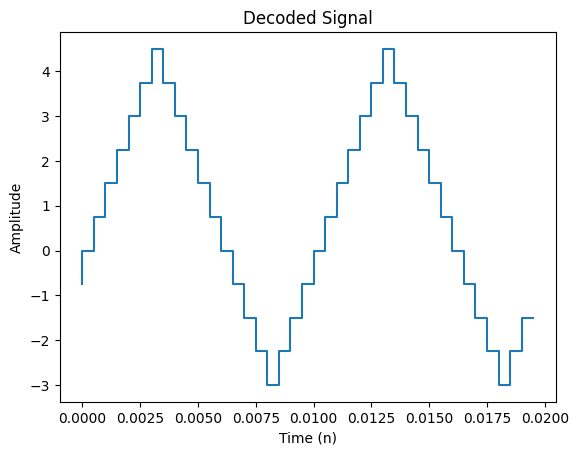

In [12]:

decoded_signal = delta_demodulation_decoder(delta_modulated_signals["delta_modulated_signal"], step_size)

plt.step(ts,decoded_signal)
plt.title('Decoded Signal')
plt.xlabel('Time (n)')
plt.ylabel('Amplitude')
plt.show()





In [13]:
# Define the filter coefficients
order = 4
cutoff_freq = 100
b, a = signal.butter(order, cutoff_freq, analog=False, fs=fs)

# Apply the filter to the decoded signal
filtered_signal = signal.lfilter(b, a, decoded_signal)


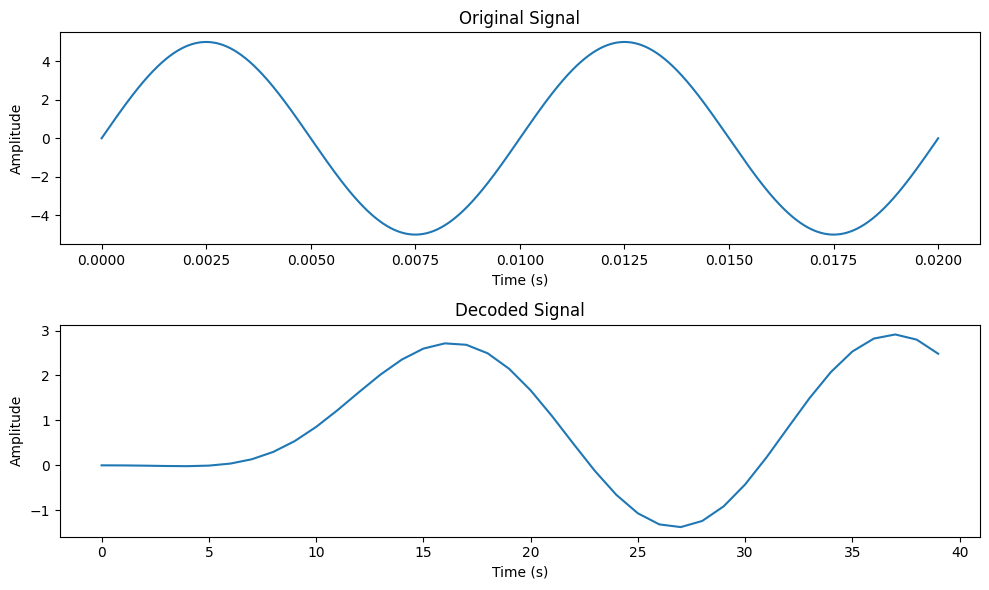

In [14]:
plt.figure(figsize=(10, 6))

# Plotting the original signal
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plotting the decoded signal
plt.subplot(2, 1, 2)
plt.plot( filtered_signal)
plt.title('Decoded Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
